In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read csv
df1= pd.read_csv('Resources/Life Expectancy Data.csv')
df2=pd.read_csv('Resources/who_suicide_statistics_2000-2015.csv')
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# show column df1
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df1.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [5]:
df2.style.set_precision(0)
df2=df2.rename(columns={'Row Labels':'Country','year': 'Year','Sum of suicides_no':'Suicides'})

C:\Users\huang\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


In [6]:
df2

,Country,Year,Suicides
0,Albania,NaN,NaN
1,Albania,2000.0,54.0
2,Albania,2001.0,119.0
3,Albania,2002.0,133.0
4,Albania,2003.0,124.0
...,...,...,...
1922,Virgin Islands (USA),2010.0,8.0
1923,Virgin Islands (USA),2011.0,8.0
1924,Virgin Islands (USA),2012.0,10.0
1925,Virgin Islands (USA),2015.0,3.0


In [7]:
# Merge df1 and df2 
df3 = pd.merge(df1, df2, how='left', on=['Country', 'Year'])

In [8]:
df3.loc[df3['Country']=='Albania']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Suicides
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,NaN
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,NaN
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,NaN
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,NaN
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,NaN
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5,96.0
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2,0.0
23,Albania,2008,Developing,75.3,1.0,1,5.61,36.622068,99.0,0,...,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0,160.0
24,Albania,2007,Developing,75.9,9.0,1,5.58,32.246552,98.0,22,...,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6,124.0
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,0.0


In [9]:
df3.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,...,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Suicides
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,1424.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,2623.733848
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,6749.523439
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,78.750000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,499.500000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,1859.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,56958.000000


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [11]:
df3.isnull().sum()*100/df3.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
Suicides                    51.531654
dtype: float64

In [12]:
# create country list
country_list = df3.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling','Suicides']

In [13]:
# Treat null values using interpolation.
for country in country_list:
    df3.loc[df3['Country'] == country,fill_list] = df3.loc[df3['Country'] == country,fill_list].interpolate()

In [14]:
#drop null values
df3.dropna(inplace=True)

In [15]:
df3.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
Suicides                    0
dtype: int64

In [16]:
df3

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Suicides
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5,96.0
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2,0.0
23,Albania,2008,Developing,75.3,1.0,1,5.61,36.622068,99.0,0,...,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0,160.0
24,Albania,2007,Developing,75.9,9.0,1,5.58,32.246552,98.0,22,...,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6,124.0
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,Uzbekistan,2004,Developing,67.8,183.0,24,1.59,34.418872,99.0,75,...,5.11,99.0,0.3,465.119887,2586435.0,3.2,3.2,0.613,11.6,1251.0
2838,Uzbekistan,2003,Developing,67.2,183.0,25,1.54,28.521358,99.0,85,...,5.17,98.0,0.3,396.129969,2556765.0,3.3,3.3,0.607,11.3,1416.0
2839,Uzbekistan,2002,Developing,67.1,186.0,27,1.47,24.994387,62.0,25,...,5.44,99.0,0.2,383.349500,2527185.0,3.3,3.3,0.600,11.0,1576.0
2840,Uzbekistan,2001,Developing,67.4,185.0,28,1.53,43.663856,62.0,22,...,5.28,99.0,0.2,456.734892,2496445.0,3.4,3.3,0.594,10.7,1914.0


In [17]:
df3['Suicides'] = df3['Suicides'].div(1000).round(1)

In [18]:
df3

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Suicides
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5,0.1
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2,0.0
23,Albania,2008,Developing,75.3,1.0,1,5.61,36.622068,99.0,0,...,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0,0.2
24,Albania,2007,Developing,75.9,9.0,1,5.58,32.246552,98.0,22,...,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6,0.1
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,Uzbekistan,2004,Developing,67.8,183.0,24,1.59,34.418872,99.0,75,...,5.11,99.0,0.3,465.119887,2586435.0,3.2,3.2,0.613,11.6,1.3
2838,Uzbekistan,2003,Developing,67.2,183.0,25,1.54,28.521358,99.0,85,...,5.17,98.0,0.3,396.129969,2556765.0,3.3,3.3,0.607,11.3,1.4
2839,Uzbekistan,2002,Developing,67.1,186.0,27,1.47,24.994387,62.0,25,...,5.44,99.0,0.2,383.349500,2527185.0,3.3,3.3,0.600,11.0,1.6
2840,Uzbekistan,2001,Developing,67.4,185.0,28,1.53,43.663856,62.0,22,...,5.28,99.0,0.2,456.734892,2496445.0,3.4,3.3,0.594,10.7,1.9


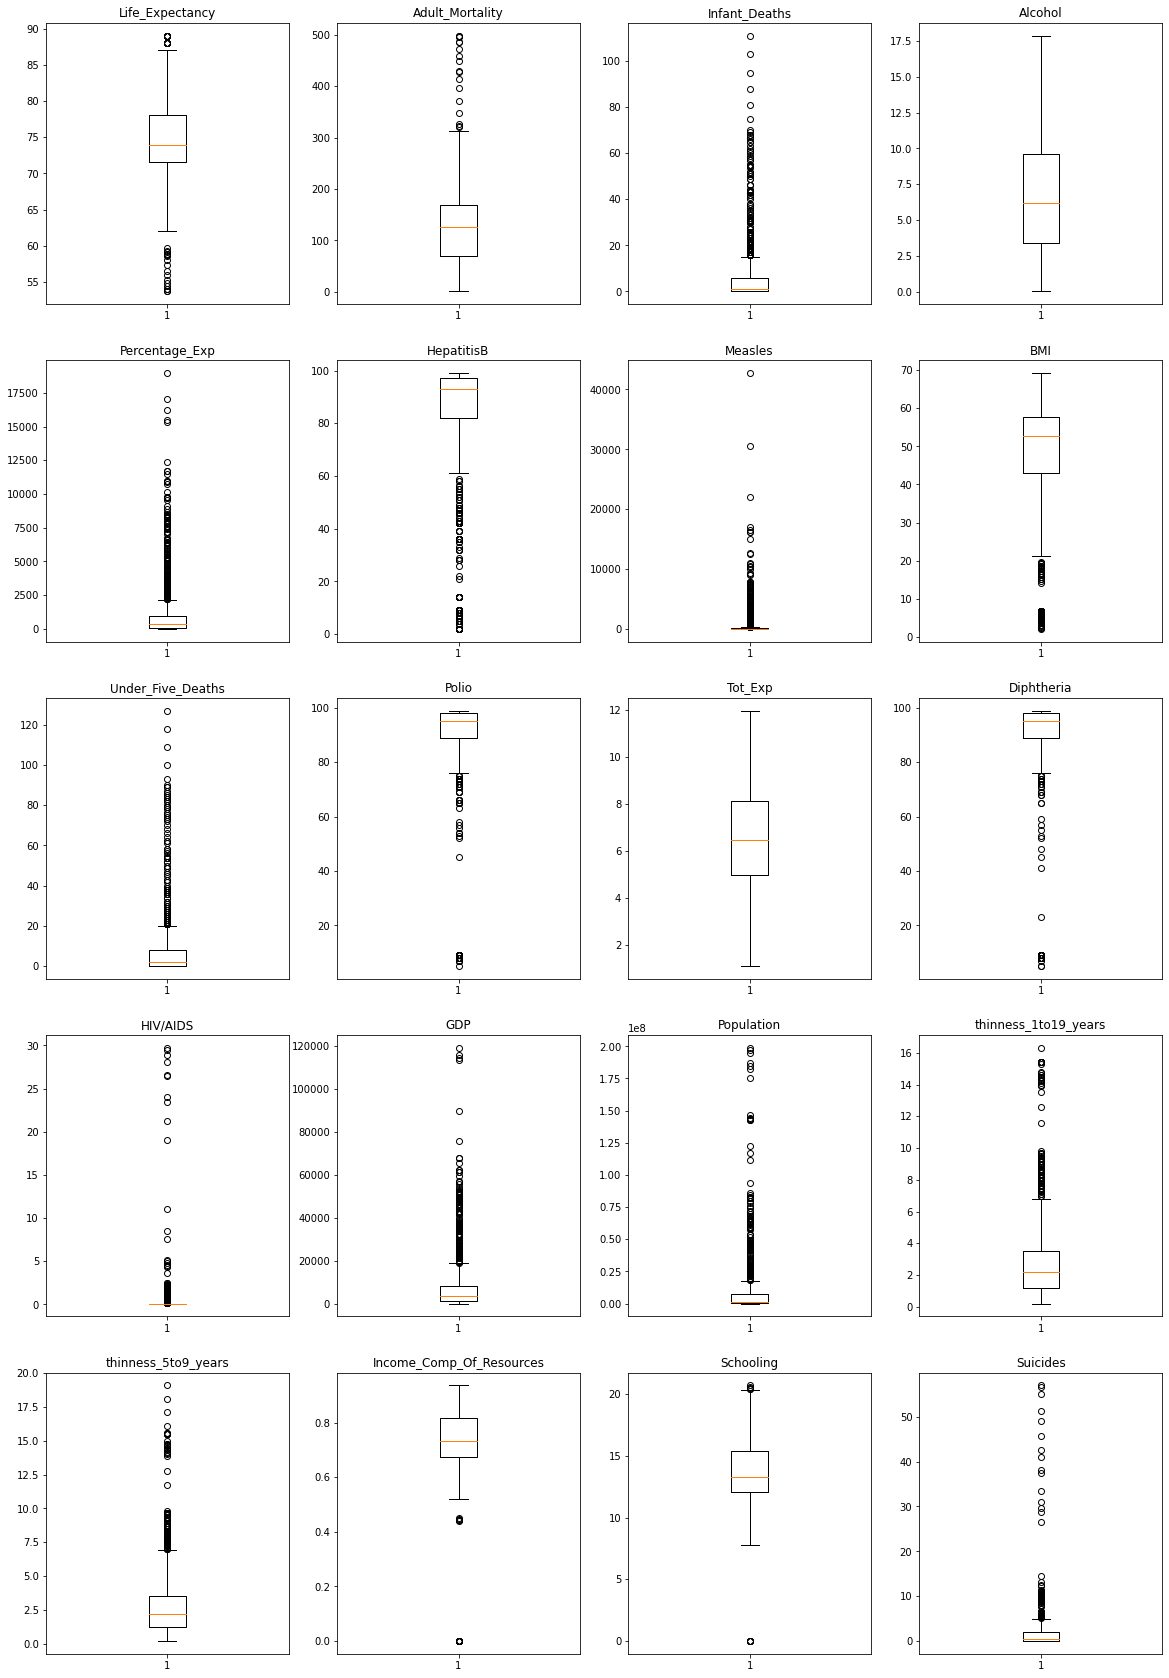

In [19]:
#create columns dict
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19,'Suicides':20}
# box-plot for outliners
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df3[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [20]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.
for variable in col_dict.keys():
    q75, q25 = np.percentile(df3[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df3[variable] > max_val) |
                                                                                           (df3[variable] < min_val))[0])),len((np.where((df3[variable] > max_val) |
                                                                                           (df3[variable] < min_val))[0]))*100/2000))

Number of outliers and percentage of it in Life_Expectancy : 34 and 1.7
Number of outliers and percentage of it in Adult_Mortality : 17 and 0.85
Number of outliers and percentage of it in Infant_Deaths : 139 and 6.95
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in Percentage_Exp : 152 and 7.6
Number of outliers and percentage of it in HepatitisB : 174 and 8.7
Number of outliers and percentage of it in Measles : 195 and 9.75
Number of outliers and percentage of it in BMI : 124 and 6.2
Number of outliers and percentage of it in Under_Five_Deaths : 123 and 6.15
Number of outliers and percentage of it in Polio : 99 and 4.95
Number of outliers and percentage of it in Tot_Exp : 0 and 0.0
Number of outliers and percentage of it in Diphtheria : 81 and 4.05
Number of outliers and percentage of it in HIV/AIDS : 251 and 12.55
Number of outliers and percentage of it in GDP : 151 and 7.55
Number of outliers and percentage of it in Population

In [21]:
# Removing Outliers in the variables using Winsorization technique.
winsorized_Life_Expectancy = winsorize(df3['Life_Expectancy'],(0.02,0.02))
winsorized_Adult_Mortality = winsorize(df3['Adult_Mortality'],(0,0.017))
winsorized_Infant_Deaths = winsorize(df3['Infant_Deaths'],(0,0.14))
winsorized_Alcohol = winsorize(df3['Alcohol'],(0.01,0))
winsorized_Percentage_Exp = winsorize(df3['Percentage_Exp'],(0,0.15))
winsorized_HepatitisB = winsorize(df3['HepatitisB'],(0.18,0))
winsorized_Measles = winsorize(df3['Measles'],(0,0.19))
winsorized_BMI = winsorize(df3['BMI'],(0.13,0))
winsorized_Under_Five_Deaths = winsorize(df3['Under_Five_Deaths'],(0,0.12))
winsorized_Polio = winsorize(df3['Polio'],(0.1,0))
winsorized_Tot_Exp = winsorize(df3['Tot_Exp'],(0.01,0))
winsorized_Diphtheria = winsorize(df3['Diphtheria'],(0.08,0))
winsorized_HIV = winsorize(df3['HIV/AIDS'],(0,0.3))
winsorized_GDP = winsorize(df3['GDP'],(0,0.15))
winsorized_Population = winsorize(df3['Population'],(0,0.14))
winsorized_thinness_1to19_years = winsorize(df3['thinness_1to19_years'],(0,0.09))
winsorized_thinness_5to9_years = winsorize(df3['thinness_5to9_years'],(0,0.1))
winsorized_Income_Comp_Of_Resources = winsorize(df3['Income_Comp_Of_Resources'],(0.04,0))
winsorized_Schooling = winsorize(df3['Schooling'],(0.01,0.01))
winsorized_Suicides = winsorize(df3['Suicides'],(0,0.1))

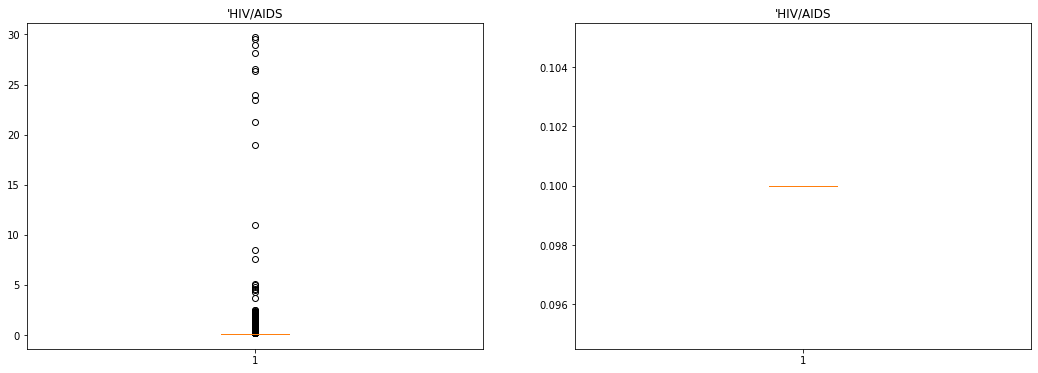

In [22]:
## test Winsorize variable

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df3['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("'HIV/AIDS")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df3['HIV/AIDS'],(0,0.3))
plt.boxplot(winsorized_HIV)
plt.title("'HIV/AIDS")

plt.show()

In [23]:
# drop HIV/AIDS changes 30% of the data, which may not give better results. Hence drop this column.
df3 = df3.drop('HIV/AIDS',axis=1)

In [24]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Suicides]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [25]:
# Adding winsorized variables to the data frame.
df3['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df3['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df3['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df3['winsorized_Alcohol'] = winsorized_Alcohol
df3['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df3['winsorized_HepatitisB'] = winsorized_HepatitisB
df3['winsorized_Measles'] = winsorized_Measles
df3['winsorized_BMI'] = winsorized_BMI
df3['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df3['winsorized_Polio'] = winsorized_Polio
df3['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df3['winsorized_Diphtheria'] = winsorized_Diphtheria
df3['winsorized_GDP'] = winsorized_GDP
df3['winsorized_Population'] = winsorized_Population
df3['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df3['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df3['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df3['winsorized_Schooling'] = winsorized_Schooling
df3['winsorized_Suicides'] = winsorized_Suicides

In [26]:
df3.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Suicides
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,...,1062.000000,1062.000000,1062.000000,1062.000000,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,2006.647834,74.263842,123.488701,6.903013,6.400683,1178.204702,80.643126,642.661959,46.450471,8.412429,...,92.545198,6.418192,92.508475,5680.639972,4.761105e+06,2.707345,2.772411,0.736986,13.565066,1.266384
std,4.249776,5.477571,78.881193,13.781827,3.922091,2290.429694,26.955679,2558.724711,16.845263,17.111856,...,6.913586,2.208651,6.927484,5813.024926,6.131769e+06,1.900821,1.970647,0.098704,2.181508,1.528464
min,2000.000000,53.700000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.100000,0.000000,...,77.000000,1.290000,76.000000,1.681350,3.400000e+01,0.200000,0.200000,0.540000,8.100000,0.000000
25%,2003.000000,71.600000,69.000000,0.000000,3.360000,79.569479,82.000000,0.000000,42.925000,0.000000,...,89.000000,4.980000,89.000000,1192.100790,1.663390e+05,1.200000,1.200000,0.673000,12.100000,0.100000
50%,2006.500000,73.900000,126.000000,1.000000,6.215000,334.087168,93.000000,3.000000,52.800000,2.000000,...,95.000000,6.455000,95.000000,3459.025466,1.396866e+06,2.200000,2.200000,0.731500,13.300000,0.500000
75%,2010.000000,78.000000,169.000000,6.000000,9.615000,920.413145,97.000000,89.250000,57.600000,8.000000,...,98.000000,8.117500,98.000000,8270.818652,7.407576e+06,3.500000,3.500000,0.815000,15.400000,2.100000
max,2014.000000,89.000000,498.000000,111.000000,17.870000,18961.348600,99.000000,42724.000000,69.200000,127.000000,...,99.000000,11.970000,99.000000,16683.945780,1.699335e+07,6.600000,6.700000,0.936000,19.800000,4.400000


In [27]:
# Distribution of each numerical variable.
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Measles','winsorized_Measles','BMI','winsorized_BMI','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Suicides','winsorized_Suicides']

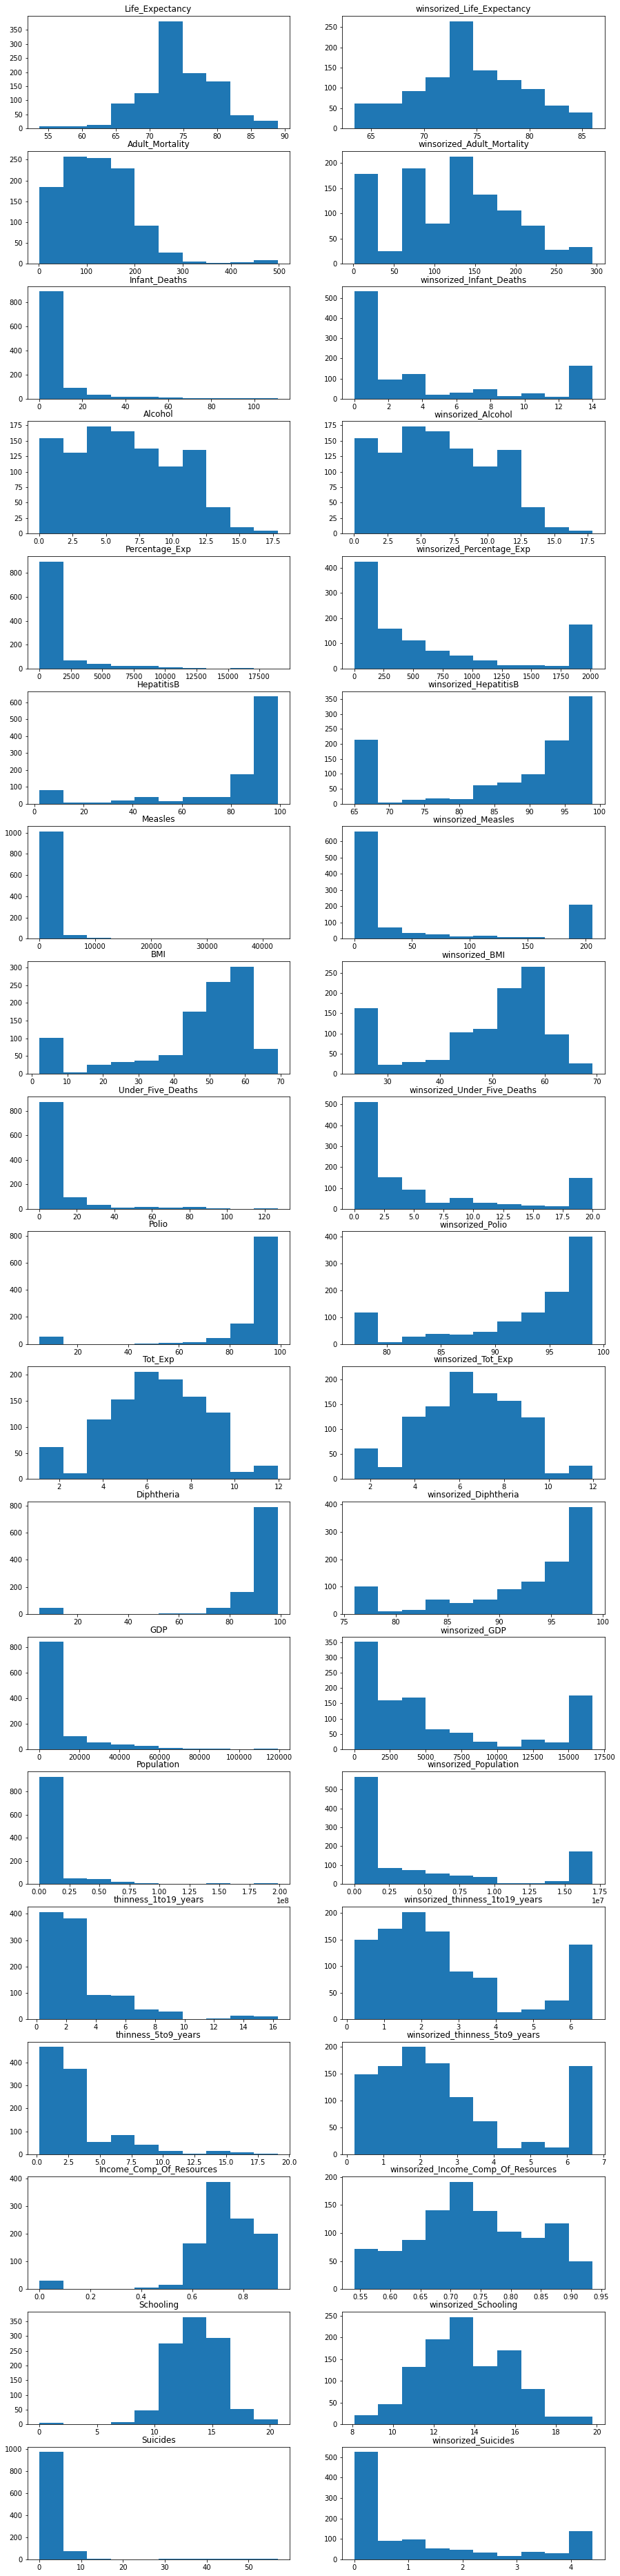

In [28]:
plt.figure(figsize=(15,75))
for i in range(len(all_col)):
    plt.subplot(21,2,i+1)
    plt.hist(df3[all_col[i]])
    plt.title(all_col[i])

plt.show()

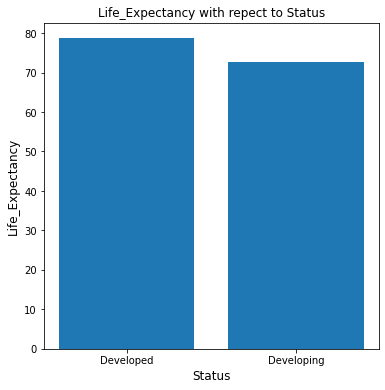

In [29]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df3.groupby('Status')['Status'].count().index,df3.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy with repect to Status")
plt.show()

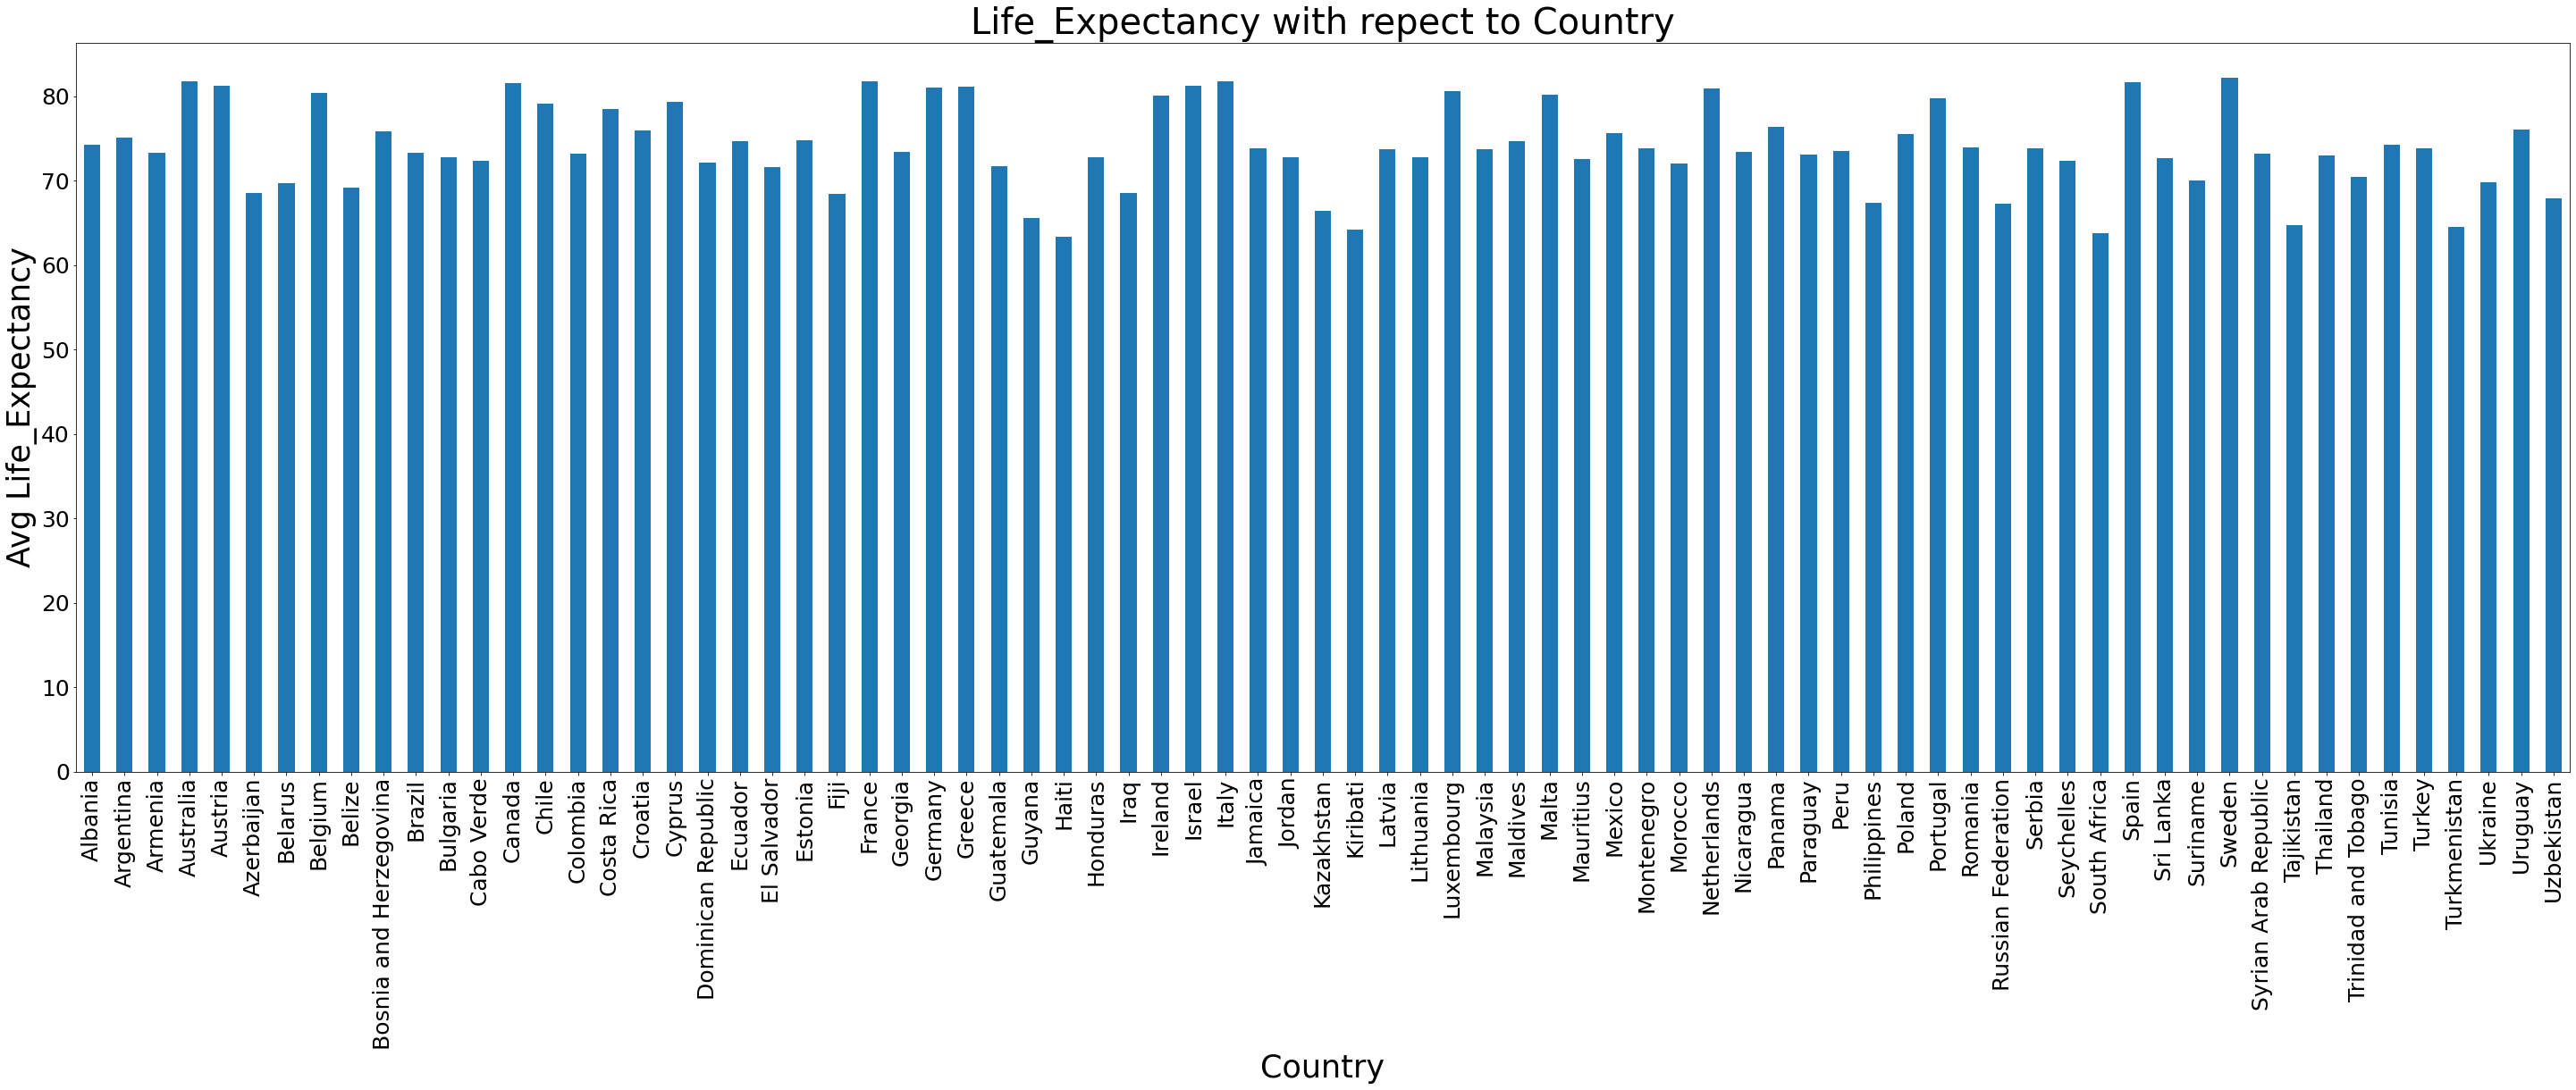

In [30]:
# Life_Expectancy with repect to Year using bar plot.
df3_country = df3.groupby('Country')['winsorized_Life_Expectancy'].mean()
df3_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy with repect to Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

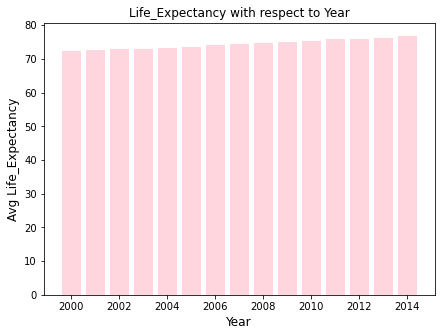

In [31]:
# Life_Expectancy with repect to Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df3.groupby('Year')['Year'].count().index,df3.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy with respect to Year")
plt.show()

In [32]:
# Correlation of winsorized variables
df3_win = df3.iloc[:,22:]
df3_win['Country'] = df3['Country']
df3_win['Year'] = df3['Year']
df3_win['Status'] = df3['Status']
df3_win_num = df3_win.iloc[:,:-3]
cormat = df3_win_num.corr()

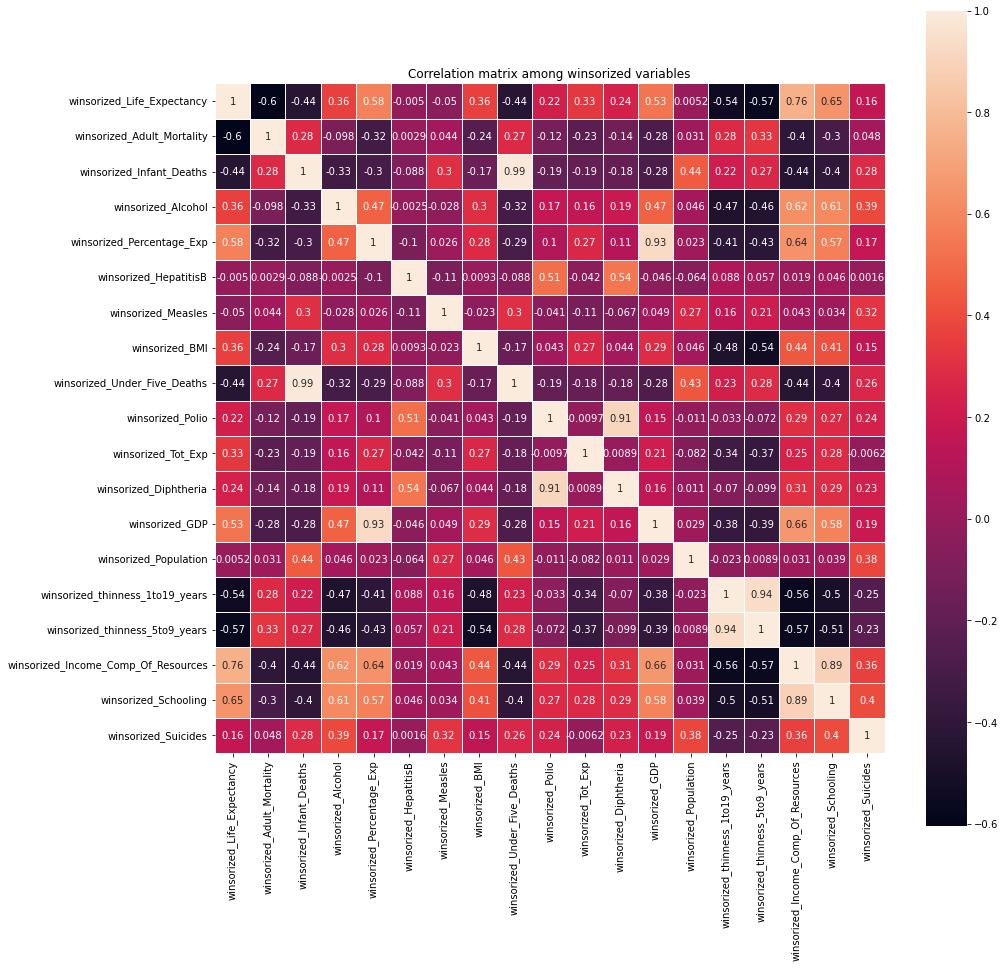

In [33]:
# Using heatmap to observe correlations.
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [34]:
round(df3[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,72.59


In [35]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using t-test
stats.ttest_ind(df3.loc[df3['Status']=='Developed','Life_Expectancy'],df3.loc[df3['Status']=='Developing','Life_Expectancy'])

# P value is <0.05. There is a 
#We can consider 'Status' as a feature as it is related to Life Expectancy.

Ttest_indResult(statistic=19.06308964817363, pvalue=6.808713442900257e-70)

In [36]:
# Create a data frame with features.
feature_df = df3[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_thinness_5to9_years','winsorized_Adult_Mortality']]


In [37]:
# Convert categorical values to numerical values using one-hot encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head()

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_thinness_5to9_years,winsorized_Adult_Mortality,Developing
21,76.2,0.725,1.5,91.0,1
22,76.1,0.721,1.6,91.0,1
23,75.3,0.713,1.6,1.0,1
24,75.9,0.703,1.7,9.0,1
25,74.2,0.696,1.8,99.0,1


In [38]:
# Perform Linear regression on Life expectancy vs Imcome_Comp_Of_Resources
linear_reg = LinearRegression()
x = final.winsorized_Income_Comp_Of_Resources.values.reshape(-1,1)
y = final.winsorized_Life_Expectancy.values.reshape(-1,1)
linear_reg.fit(x, y)

LinearRegression()

In [39]:
# Predict
y_predicted = linear_reg.predict(x)

In [40]:
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

In [42]:
# print values
print('Slope:' ,linear_reg.coef_)
print('Intercept:', linear_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.03923713]]
Intercept: [45.56639258]
Root mean squared error:  10.765990061189381
R2 score:  0.5794574710773286


In [43]:
print(r2_score(y,linear_reg.predict(x)))

0.5794574710773286


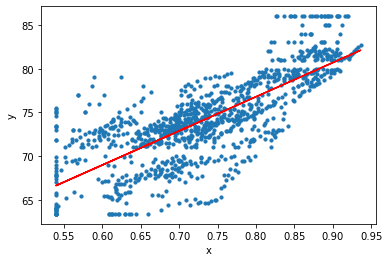

In [44]:
# plot 
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [45]:
# Life expectancy vs other 5 variables on Polynomial regression.
x = final.iloc[:,1:5].values
y = final.winsorized_Life_Expectancy.values.reshape(-1,1)

In [58]:
# use degree = 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 20)
poly = PolynomialFeatures(degree=2)
poly_reg = LinearRegression()
model = poly_reg.fit(poly.fit_transform(x_train),y_train)

In [59]:
# print values
print('Slope:' ,poly_reg.coef_)
print('Intercept:', poly_reg.intercept_)

Slope: [[ 0.00000000e+00  1.51791407e+01 -2.03110540e+00  5.80425827e-02
   4.88416370e+00  1.25499755e+01 -3.81964273e-01 -3.10975565e-02
  -1.01729671e+01  3.32789515e-01 -3.41210576e-04 -6.45088278e-01
  -2.06416746e-04 -4.72863841e-03  4.88416370e+00]]
Intercept: [58.69997576]


In [71]:
# model score
model.score(poly.fit_transform(x_train), y_train)

0.8236937922102464

In [74]:
# cross validation iterate 10 times
cross_val_score(model, poly.fit_transform(x_train),  y_train, cv= 10, scoring= "r2").mean()

0.8075690012108353

In [75]:
# use degree = 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 20)
poly = PolynomialFeatures(degree=3)
poly_reg = LinearRegression()
model = poly_reg.fit(poly.fit_transform(x_train),y_train)

In [76]:
# print values
print('Slope:' ,poly_reg.coef_)
print('Intercept:', poly_reg.intercept_)

Slope: [[ 6.91432637e-06 -1.71506749e+02 -3.33132583e+01  1.82330430e-01
  -1.00870646e+01  1.17065577e+02  5.25084319e+01 -8.93581732e-02
   1.98763982e+01  6.27316392e-01  1.97319564e-02  1.00058876e+01
  -1.07748048e-03 -1.60452686e-02 -1.00870559e+01 -5.98529134e-02
  -2.03173006e+01 -1.10573142e-01 -9.35997841e+00 -8.60352477e-01
   6.48823026e-03 -1.86260259e+01  4.84085326e-04  6.52354829e-02
   1.98763965e+01  1.14779553e-01 -1.30627962e-03 -8.71276462e-01
   8.72265632e-06 -1.61798595e-02  1.00057511e+01  1.11137177e-06
   6.65950727e-06 -1.60334913e-02 -1.00870170e+01]]
Intercept: [143.83639016]


In [77]:
# model score
model.score(poly.fit_transform(x_train), y_train)

0.8461935885902719

In [78]:
# cross validation iterate 10 times
cross_val_score(model, poly.fit_transform(x_train),  y_train, cv= 10, scoring= "r2").mean()

0.814109896859323